In [36]:
# Read libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ridge / L2 regression.
from ridge import ridge_reg

In [37]:
# Open data.
data = pd.read_csv('data.csv')

data.head(5)

,state_po,D12,D16,bach2016,bach_white2016,538_2016_avg,Manuf_Constr
0,AL,0.387838,0.356259,0.247,0.273,0.334540,0.208
1,AK,0.426847,0.416143,0.296,0.367,0.353876,0.117
2,AZ,0.453866,0.481100,0.289,0.353,0.423319,0.152
3,AR,0.378456,0.357149,0.224,0.240,0.344622,0.204
4,CA,0.618728,0.661282,0.329,0.431,0.556942,0.154


In [38]:
# Remove state labels and get target.
states = data.pop('state_po')
y = data.pop('D16')

# Center target.
y_mean = y.mean()
y = y - y_mean

# Center predictors.
X_means = data.mean()
X = data - X_means

In [39]:
# Define and fit regression.
model_ridge = ridge_reg(X, y)
model_ridge.fit()

# Model results.
res = model_ridge.result
res

,edfs,cv_err,cv_std_err
0,0.0,0.011692,0.000928
1,1.0,0.001901,0.000082
2,2.0,0.000577,0.000056
3,3.0,0.000410,0.000058
4,4.0,0.000342,0.000057
5,5.0,0.000317,0.000056


In [40]:
# Find the best model.
best_mod_idx = res.cv_err.idxmin()
best_mask = res.index == best_mod_idx
res['best'] = np.where(best_mask, 1, 0)


# Find model within one standard deviation of the best model.
res['within_one'] = (res['cv_err'] + res['cv_std_err'])
res['within_'] = np.where(res.cv_err <= res.within_one[best_mod_idx], 1, 0)

optimal_model_idx = res['within_'].idxmax()
optimal_mask = res.index == optimal_model_idx


# Coordinates for plotting.
y_coord = res[best_mask].within_one
x_coord = res[optimal_mask].edfs

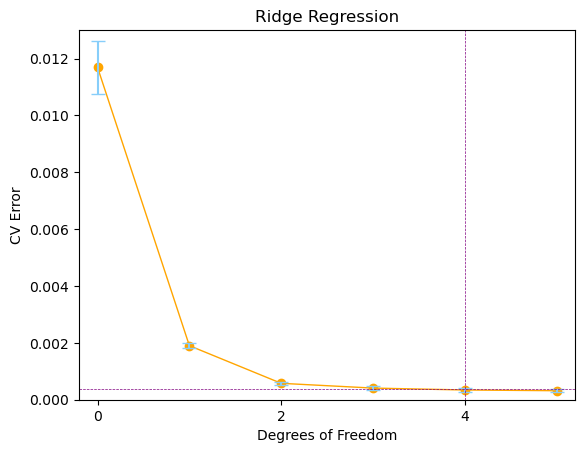

In [41]:
plt.plot(res['edfs'], res['cv_err'], 'o-', color='orange', lw=1)
plt.errorbar(res['edfs'], res['cv_err'], yerr=res['cv_std_err'], ecolor='lightskyblue', ls='None', capsize=5)

plt.xticks([0, 2, 4])
plt.ylim(0, 0.013)
plt.xlim(-.2, 5.2)

plt.plot([-.2, 5.2], [y_coord, y_coord], '--', color='purple', lw=0.5)
plt.plot([x_coord, x_coord],[0,0.013], '--', color='purple', lw=0.5)


plt.title("Ridge Regression")
plt.xlabel('Degrees of Freedom')
plt.ylabel('CV Error')

plt.show()

In [42]:
# Examining the change in predictor coefficients with changing hyperparameter / penalty.
model_ridge2 = ridge_reg(X, y, inc=0.5, cross_valid=False)
model_ridge2.fit()
ridge_betas = model_ridge2.result

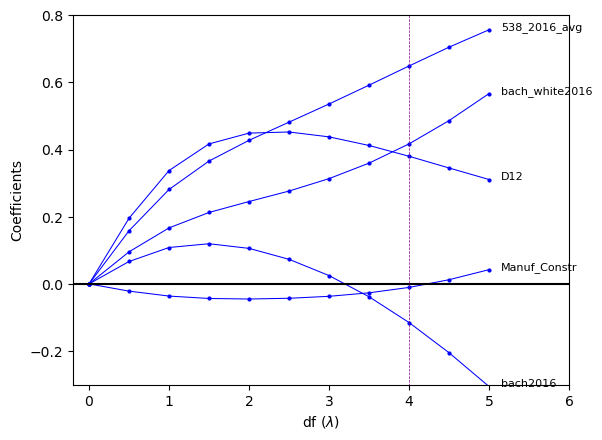

In [43]:
# Graphic.
const_model = np.zeros(5)
ridge_betas.insert(0, const_model)

dfs = np.arange(0, X.shape[1] + 0.5, 0.5)

plt.plot(dfs, ridge_betas, 'o-',markersize=2, c='blue', lw=0.75)

plt.ylabel('Coefficients')
plt.xlabel('df ($\lambda$)')

plt.hlines(y=0, xmin=-0.2, xmax=6, colors='black')
plt.plot([x_coord, x_coord],[-1,1], '--', color='purple', lw=0.5)

plt.xlim([-0.2, 6])
plt.ylim([-0.3, 0.8])

for x, y, s in zip(np.ones(5)*(5+0.15), ridge_betas[-1], X.columns):
    plt.text(x, y, s, color='0', fontsize=8)
plt.show()